# Simulating the Kibble-Zurek Mechanism on a Quantum Computer

This notebook demonstrates the use of a quantum computer for ... . It has the following sections:

1. [The Kibble-Zurek Mechanism](#The-Kibble-Zurek-Mechanism) describes.
2. 

## The Kibble-Zurek Mechanism

The [[1]](#1) Nature paper

<img src="_static/temp1_kz_overview.png" width="500">

<img src="_static/tmp_coherent.png" width="800">

## References

<a name="1">[1]</a> King, A.D., Suzuki, S., Raymond, J. et al. 
Coherent quantum annealing in a programmable 2,000 qubit Ising chain. 
Nat. Phys. 18, 1324–1328 (2022). https://doi.org/10.1038/s41567-022-01741-6


In [ ]:
from dwave.system import DWaveSampler
import minorminer

# TO BE UPDATED: 
#sampler = DWaveSampler(solver={'topology__type': 'zephyr'})
sampler = DWaveSampler(solver="Advantage2_prototype2_...")
print(sampler.solver.name)

In [ ]:
from helpers.qa import create_bqm

L = 500

# Currently using simple minorminer `find_embedding` function
bqm = create_bqm(L, coupling_strength=-1)
embedding = minorminer.find_embedding(bqm.quadratic, sampler.edgelist)
print(max(len(val) for val in embedding.values()) == 1)



In [ ]:
from dwave.system import FixedEmbeddingComposite
# For now define a `placeholder_submission_if` until a formal API exists for such short anneal times


In [ ]:
times1 = [t for t in range(5, 10, 1)]       # First log section
times2 = [t for t in range(10, 100, 10)]    # second
times3 = [t for t in range(100, 1000, 200)]

Js = [0.12, -0.7, -1.4]

sampleset = {}
for J in [0.12, -1.4]:
    bqm = create_bqm(L, J)
    
    for ta in [5, 7.5, 10, 20, 30, 40, 50, 100, 200, 500, 750, 1000, 2000, 10000, 50000]:
        sampleset[(J, ta)] = placeholder_submission_if({'sampler': sampler, 
                               'embedding': embedding,
                               'bqm': bqm,
                               'num_reads': 5000, 
                               'label': f'{J}: J; {ta} t_a',
                               'anneal_time': 0.001*ta})

In [ ]:
from helpers.kb_calcs import avg_kink_density
import matplotlib.pyplot as plt

results = {}
for key, samples in sampleset.items():
    results[key] = avg_kink_density(samples)

In [ ]:
for J in sorted(set(j for (j,ta) in results.keys())):
    results_j = [(ta, val) for (j, ta), val in results.items() if j==J]
    plt.plot([ta for (ta, kink) in results_j], [kink for (ta, kink) in results_j], "*", label=J)
plt.legend()
plt.xscale("log")
plt.yscale("log")

# Appendix: Comparison to Coherent Theory

Probably will not be part of this example

<img src="_static/tmp_coherent.png" width="800">

In [25]:
import pandas as pd

# Temporarily using the standard schedule, must be replaced with new one
schedule = pd.read_csv('09-1302A-B_Advantage2_prototype2.2_annealing_schedule.csv')
A = schedule['A(s) (GHz)']
A_tag = A.diff()/0.001     
B = schedule['B(s) (GHz)']
B_tag = B.diff()/0.001     

In [28]:
QFP = 2.014

print(abs(A - QFP).idxmin())
print(abs(B - QFP).idxmin())

sc_indx = abs(A - QFP).idxmin()
print(A[sc_indx])

223
223
2.014254


In [48]:
h_bar = 1.054571817*10**(-34)

b_top = A[sc_indx]/h_bar
b_bottom = (B_tag[sc_indx]/B[sc_indx]) - (A_tag[sc_indx]/A[sc_indx])
b = b_top/b_bottom

print(b)

1.718322814083078e+33


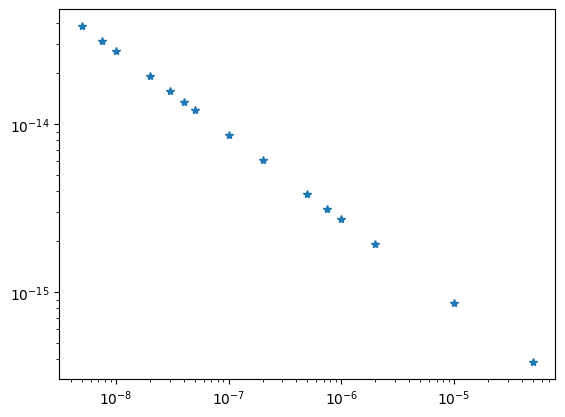

In [49]:
import numpy as np
import matplotlib.pyplot as plt
ta = [10**(-9) * ns for ns in[5, 7.5, 10, 20, 30, 40, 50, 100, 200, 500, 750, 1000, 2000, 10000, 50000]]
n = np.power(ta, -0.5)/(2*np.pi*np.sqrt(2*b))

plt.plot(ta, n, "*")
plt.yscale("log")
plt.xscale("log")

Copyright &copy; 2024 D-Wave Systems, Inc

The software is licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This Jupyter Notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>